In [1]:
from core.preprocessing import detrend_data
import numpy as np
import pandas as pd
df = pd.read_pickle('data/master_dataset.pkl').fillna(0)
df = df.loc['2015-07-15':'2017-07-14']
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style='darkgrid', palette='colorblind', context='talk')

In [2]:
detrended_df, clearsky_df = detrend_data(df, return_clearsky=True)

In [5]:
detrended_df.to_pickle('detrended_master_dataset.pkl')

In [12]:
clearsky_df.to_pickle('clearsky_master_dataset.pkl')

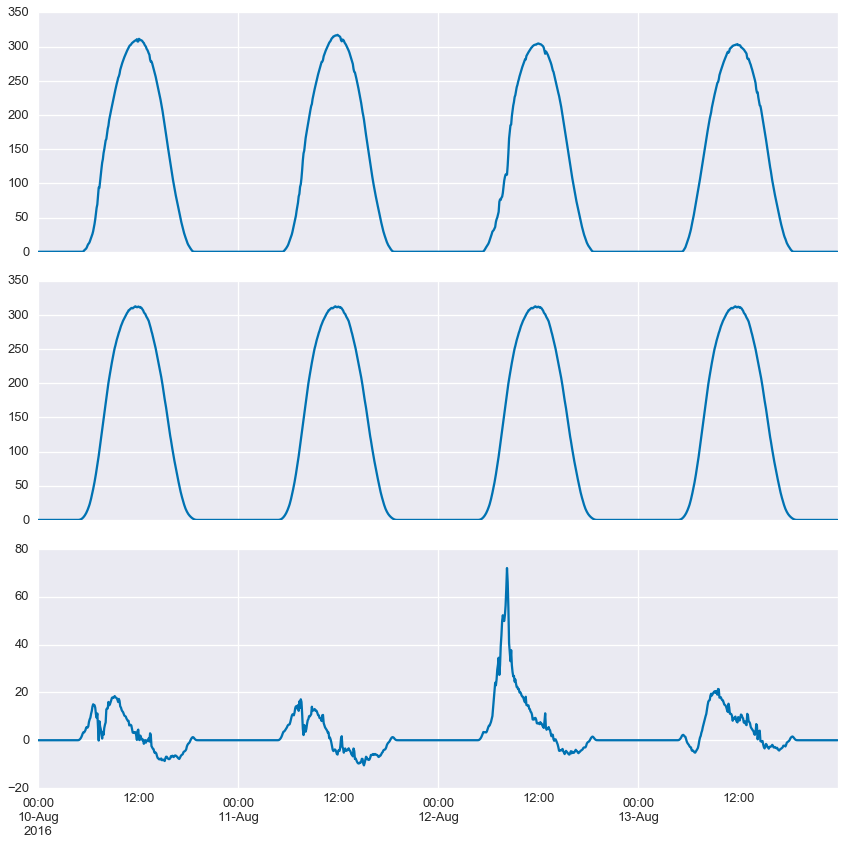

In [10]:
start = '2016-08-10'
stop = '2016-08-13'
fig, axes = plt.subplots(nrows=3, figsize=(12, 12), sharex=True)
df['total_power'].loc[start:stop].plot(ax=axes[0])
clearsky_df['total_power'].loc[start:stop].plot(ax=axes[1])
detrended_df['total_power'].loc[start:stop].plot(ax=axes[2])
plt.tight_layout()

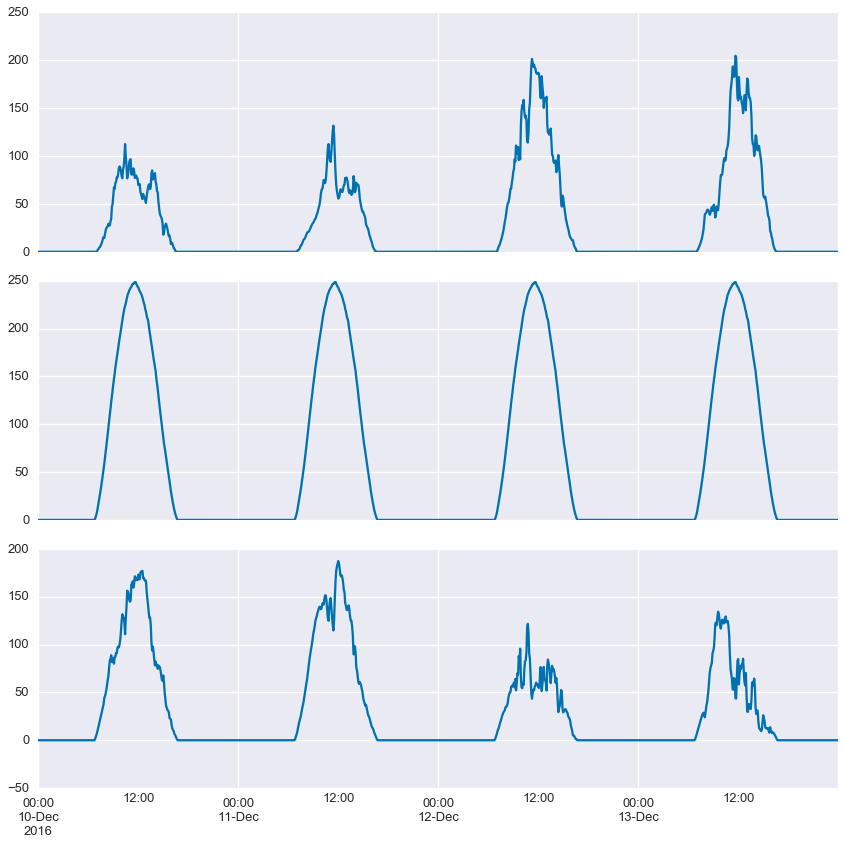

In [11]:
start = '2016-12-10'
stop = '2016-12-13'
fig, axes = plt.subplots(nrows=3, figsize=(12, 12), sharex=True)
df['total_power'].loc[start:stop].plot(ax=axes[0])
clearsky_df['total_power'].loc[start:stop].plot(ax=axes[1])
detrended_df['total_power'].loc[start:stop].plot(ax=axes[2])
plt.tight_layout()

In [16]:
df.index.dayofyear

Int64Index([196, 196, 196, 196, 196, 196, 196, 196, 196, 196,
            ...
            195, 195, 195, 195, 195, 195, 195, 195, 195, 195],
           dtype='int64', length=210528)

In [17]:
df.index.time

array([datetime.time(0, 0), datetime.time(0, 5), datetime.time(0, 10), ...,
       datetime.time(23, 45), datetime.time(23, 50), datetime.time(23, 55)], dtype=object)

In [19]:
len(df.index) / 288

731

In [20]:
foo = np.arange(288)

In [23]:
np.tile(foo, 731)

array([  0,   1,   2, ..., 285, 286, 287])

In [6]:
from core.preprocessing import DROP_LIST

In [7]:
for item in DROP_LIST:
    key = 'S{:02}'.format(item)
    del detrended_df[key]